**Project Scope:**

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1) Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.

In [5]:
df = pd.read_csv('fcc-forum-pageviews.csv')
df.set_index('date', inplace=True)

In [6]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


2) Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [7]:
df = df[(df.value <= df.value.quantile(0.975)) & (df.value >= df.value.quantile(0.025))]

In [13]:
# Make the index into a datetime dtype

df.index = pd.to_datetime(df.index)

3) Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

In [28]:
def draw_line_plot(data):
    
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.plot(data.index, data.value, color='red')
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")

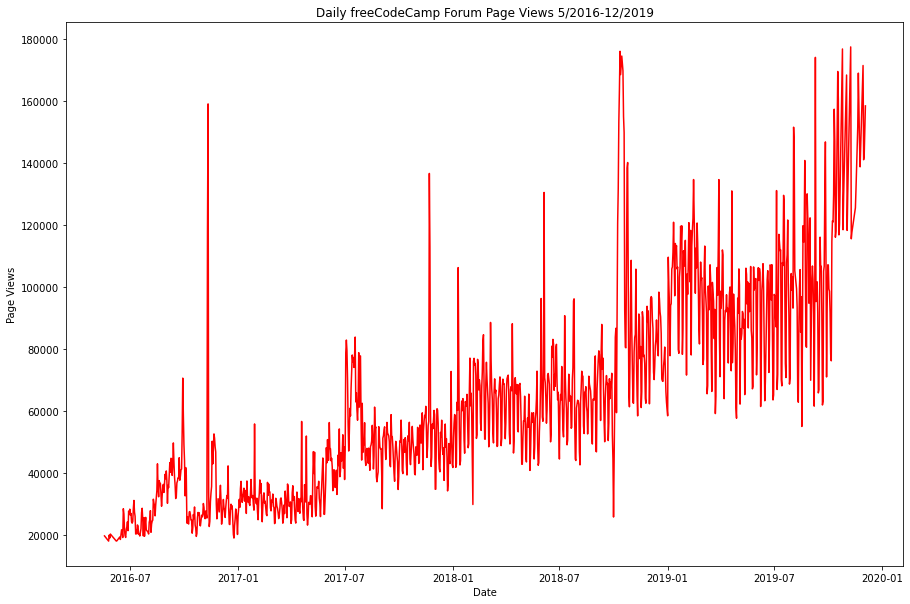

In [30]:
draw_line_plot(df)

4) Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [110]:
def draw_bar_plot(data):
    
    data_copy = data.copy()

    data_copy['month'] = data_copy.index.month

    data_copy['year'] = data_copy.index.year

    grouped_data = data_copy.groupby(['year', 'month']).value.mean()

    grouped_data.unstack().plot(figsize=(15, 10), kind='bar') # It knows to plot the indices against the values

    plt.legend(title='Months', labels=['Jan', 'Feb', 'Mar', 'April', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], loc=2)
    
    plt.ylabel('Average Page Views')
    
    plt.xlabel('Years')

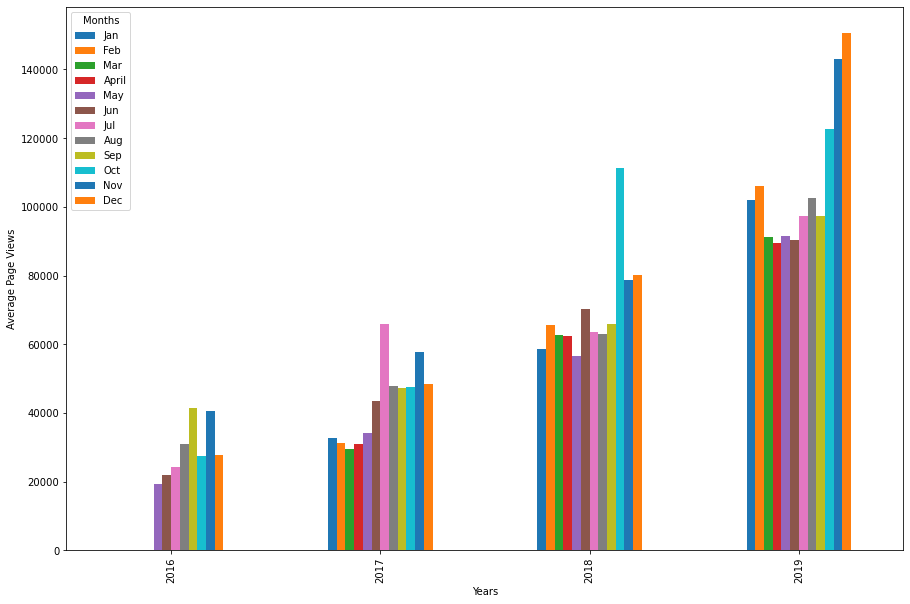

In [111]:
draw_bar_plot(df)

5) Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

In [148]:
def draw_box_plot(data):
    
    df_box = data.copy()
    
    mapping = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
    
    df_box['month'] = df_box.index.month.map(mapping)
    
    df_box['year'] = df_box.index.year
    
    plt.figure(figsize=(20, 10))
    
    plt.subplot(1, 2, 1)
    
    sns.boxplot(data=df_box, x='year', y='value')
    
    plt.ylabel('Page Views')
    
    plt.xlabel('Year')
    
    plt.title("Year-wise Box Plot (Trend)")
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(data=df_box, x='month', y='value', order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    
    plt.ylabel('Page Views')
    
    plt.xlabel('Month')
    
    plt.title("Month-wise Box Plot (Seasonality)")

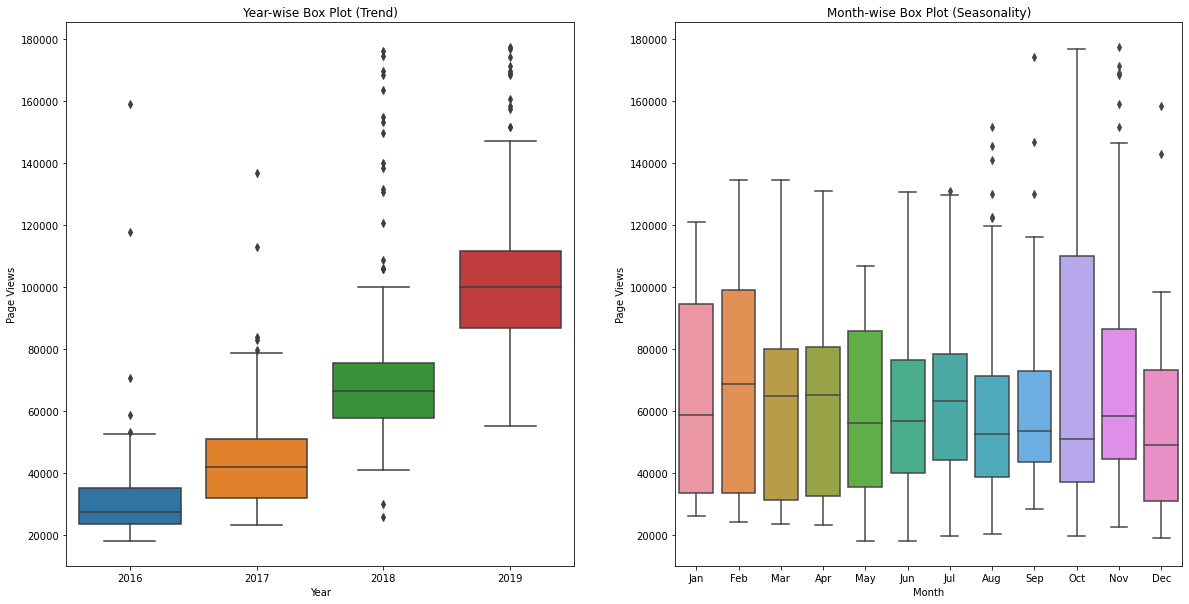

In [149]:
draw_box_plot(df)